In [1]:
import re
import scipy
import string
import pickle
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder            
from sklearn.svm import LinearSVC             
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier          
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score    
from astropy.table import Table, Column 


In [2]:
train_data=pd.read_csv(r"c:\Users\Muneeb Ahmed Sheikh\Downloads\Gender_Identification_train.csv")

In [3]:
test_data=pd.read_csv(r"c:\Users\Muneeb Ahmed Sheikh\Downloads\Gender_Identification_test.csv")

In [4]:
train_data.columns

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [5]:
train_data['gender'].count()

6

In [6]:
test_data.head()

,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [7]:
test_data.columns

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

In [8]:
test_data['gender'].count()

4

In [9]:
train_data['gender'].value_counts()

Female    3
Male      3
Name: gender, dtype: int64

In [10]:
grouped = train_data.groupby('gender')
for group in grouped:
    print("result:\n",group)

result:
 ('Female',    height  weight    hair beard scarf  gender
1   170.0     120    Long    No    No  Female
3   163.4     110  Medium    No   Yes  Female
5   165.0     150  Medium    No   Yes  Female)
result:
 ('Male',      height  weight   hair beard scarf gender
0  180.3000     196   Bald   Yes    No   Male
2  178.5000     200  Short    No    No   Male
4  175.2222     220  Short   Yes    No   Male)


In [11]:
test_data['gender'].value_counts()

Female    2
Male      2
Name: gender, dtype: int64

In [12]:
grouped = test_data.groupby('gender')
for group in grouped:
    print("result:\n",group)

result:
 ('Female',    height  weight    hair beard scarf  gender
1   160.5     130   Short    No    No  Female
3   161.1     100  Medium    No    No  Female)
result:
 ('Male',    height  weight  hair beard scarf gender
0   179.1     185  Long   Yes    No   Male
2   177.8     160  Bald    No    No   Male)


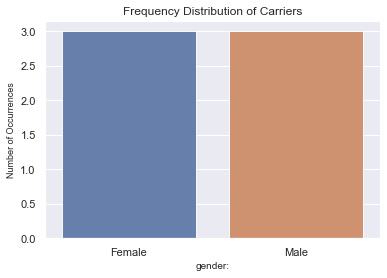

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =train_data['gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index,carrier_count.values,alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=9)
plt.xlabel('gender:', fontsize=10)
plt.show()

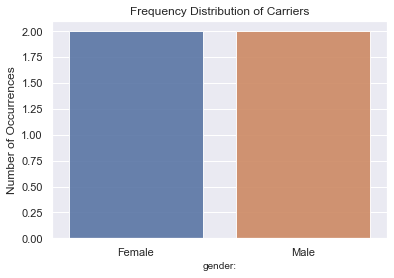

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =test_data['gender'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index,carrier_count.values,alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('gender:', fontsize=10)
plt.show()

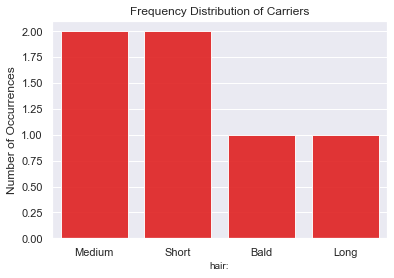

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =train_data['hair'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9,color='red')
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hair:', fontsize=10)
plt.show()

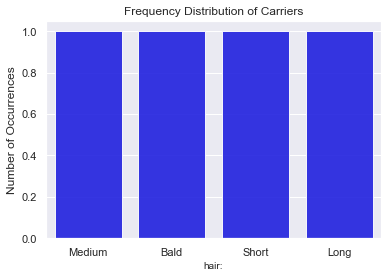

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =test_data['hair'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9,color='blue')
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hair:', fontsize=10)
plt.show()

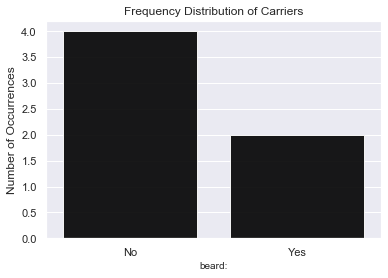

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =train_data['beard'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9,color='black')
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('beard:', fontsize=10)
plt.show()

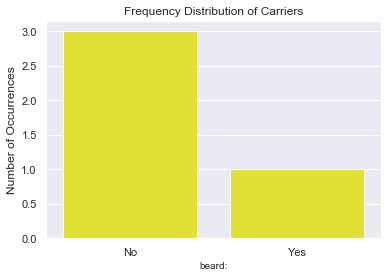

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count =test_data['beard'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9,color='yellow')
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('beard:', fontsize=10)
plt.show()

In [19]:
print("pre-processing before:")
train_data.head()

pre-processing before:


,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male


In [20]:
print("pre-processing after:")
test_data.head()

pre-processing after:


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [21]:
train_data_encoded= train_data.copy()
train_data_original=train_data.copy()
test_data_encoded=test_data.copy()
gender_label_encoder = LabelEncoder()
train_data["encoded_gender"] =gender_label_encoder.fit_transform(train_data['gender'])
print("Gender Attribute Encoding in Train Dataset:\n==========================================")
train_data[["encoded_gender","gender"]]

Gender Attribute Encoding in Train Dataset:


,encoded_gender,gender
0,1,Male
1,0,Female
2,1,Male
3,0,Female
4,1,Male
5,0,Female


In [22]:
scarf_label_encoder = LabelEncoder()
train_data["encoded_scarf"] =scarf_label_encoder.fit_transform(train_data['scarf'])
print("Scarf Attribute Encoding in Train Dataset:\n==========================================")
train_data[["encoded_scarf","scarf"]]

Scarf Attribute Encoding in Train Dataset:


,encoded_scarf,scarf
0,0,No
1,0,No
2,0,No
3,1,Yes
4,0,No
5,1,Yes


In [23]:
beard_label_encoder=LabelEncoder()
train_data["encoded_beard"]=beard_label_encoder.fit_transform(train_data['beard'])
print("Beard Attribute Encoding in Train Dataset:\n==========================================")
train_data[["encoded_beard","beard"]]

Beard Attribute Encoding in Train Dataset:


,encoded_beard,beard
0,1,Yes
1,0,No
2,0,No
3,0,No
4,1,Yes
5,0,No


In [24]:
hair_label_encoder=LabelEncoder()
train_data["encoded_hair"]=hair_label_encoder.fit_transform(train_data['hair'])
print("hair Attribute Encoding in Train Dataset:\n==========================================")
train_data[["encoded_hair","hair"]]

hair Attribute Encoding in Train Dataset:


,encoded_hair,hair
0,0,Bald
1,1,Long
2,3,Short
3,2,Medium
4,3,Short
5,2,Medium


In [25]:
train_data.head()

,height,weight,hair,beard,scarf,gender,encoded_gender,encoded_scarf,encoded_beard,encoded_hair
0,180.3000,196,Bald,Yes,No,Male,1,0,1,0
1,170.0000,120,Long,No,No,Female,0,0,0,1
2,178.5000,200,Short,No,No,Male,1,0,0,3
3,163.4000,110,Medium,No,Yes,Female,0,1,0,2
4,175.2222,220,Short,Yes,No,Male,1,0,1,3


In [26]:
train_data_encoded[['hair','beard','scarf','gender']]=train_data[['encoded_hair','encoded_beard','encoded_scarf','encoded_gender']]
print("Original Data:\n")
print(train_data_original)
print("\n\nData after Label Encoding:\n")
print(train_data_encoded)

Original Data:

     height  weight    hair beard scarf  gender
0  180.3000     196    Bald   Yes    No    Male
1  170.0000     120    Long    No    No  Female
2  178.5000     200   Short    No    No    Male
3  163.4000     110  Medium    No   Yes  Female
4  175.2222     220   Short   Yes    No    Male
5  165.0000     150  Medium    No   Yes  Female


Data after Label Encoding:

     height  weight  hair  beard  scarf  gender
0  180.3000     196     0      1      0       1
1  170.0000     120     1      0      0       0
2  178.5000     200     3      0      0       1
3  163.4000     110     2      0      1       0
4  175.2222     220     3      1      0       1
5  165.0000     150     2      0      1       0


In [27]:
replace_map = {'gender': {'Male': 1, 'Female': 0}, 'scarf': {'Yes': 1, 'No': 0}, 'beard': {'Yes': 1, 'No': 0}, 'hair': {'Bald': 0, 'Short': 1, 'Medium': 2, 'Long': 3} }
test_data_encoded.replace(replace_map, inplace=True)
print("Orginal Test Data\n======================")
print(test_data)
print("Test Data after Label Encoding:\n===========================")
print(test_data_encoded)



Orginal Test Data
   height  weight    hair beard scarf  gender
0   179.1     185    Long   Yes    No    Male
1   160.5     130   Short    No    No  Female
2   177.8     160    Bald    No    No    Male
3   161.1     100  Medium    No    No  Female
Test Data after Label Encoding:
   height  weight  hair  beard  scarf  gender
0   179.1     185     3      1      0       1
1   160.5     130     1      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


In [28]:
train_feature=['height','weight','hair','beard','scarf']
test_feature=['height','weight','hair','beard','scarf']
y=train_data_encoded['gender']
Y_test=test_data_encoded['gender']

In [29]:
x = pd.get_dummies(train_data_encoded[train_feature])
print(x)

     height  weight  hair  beard  scarf
0  180.3000     196     0      1      0
1  170.0000     120     1      0      0
2  178.5000     200     3      0      0
3  163.4000     110     2      0      1
4  175.2222     220     3      1      0
5  165.0000     150     2      0      1


In [30]:
X_test = pd.get_dummies(test_data_encoded[test_feature])
print(X_test)

   height  weight  hair  beard  scarf
0   179.1     185     3      1      0
1   160.5     130     1      0      0
2   177.8     160     0      0      0
3   161.1     100     2      0      0


In [31]:
logisticRegression = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logisticRegression.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions1 =logisticRegression.predict(X_test)

In [33]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(x,y)


C:\Users\Muneeb Ahmed Sheikh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
predictions2=randomForestClassifier.predict(X_test)

In [35]:
linearSVC = LinearSVC()
linearSVC.fit(x,y)

C:\Users\Muneeb Ahmed Sheikh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [36]:
predictions3=linearSVC.predict(X_test)

In [37]:
Ber = BernoulliNB()
Ber.fit(x,y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [38]:
predictions4=Ber.predict(X_test)

In [39]:
print("Prediction using Logistic Regression:\n=====================================")
test_data["predicted_gender"]=gender_label_encoder.inverse_transform(predictions1)
test_data.head()

Prediction using Logistic Regression:


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [40]:
regression_score = logisticRegression.score(X_test,Y_test)
print("Accuracy score:\n ===============","\n",regression_score)

Accuracy score:
 0.75


In [41]:
print("Prediction using RandomForestClassifier:\n========================================")
test_data["predicted_gender"]=gender_label_encoder.inverse_transform(predictions2)
test_data.head()

Prediction using RandomForestClassifier:


,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


In [42]:
RandomForest_score=logisticRegression.score(X_test,Y_test)
print("Accuracy score:\n ===============","\n",RandomForest_score)

Accuracy score:
 0.75


In [43]:
test_data["predicted_gender"]=gender_label_encoder.inverse_transform(predictions3)
test_data.head()

,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Female
3,161.1,100,Medium,No,No,Female,Female


In [44]:
Linearsvcscore = linearSVC.score(X_test,Y_test)
print("LinearSVC score", + Linearsvcscore)

LinearSVC score 0.75


In [45]:
test_data["predicted_gender"]=gender_label_encoder.inverse_transform(predictions4)
test_data.head()

,height,weight,hair,beard,scarf,gender,predicted_gender
0,179.1,185,Long,Yes,No,Male,Male
1,160.5,130,Short,No,No,Female,Female
2,177.8,160,Bald,No,No,Male,Male
3,161.1,100,Medium,No,No,Female,Female


In [46]:
Ber_score = Ber.score(X_test,Y_test)
print("Ber", + Ber_score)

Ber 1.0


In [47]:
print("Model                Acuuracy\n==============================")
print("logisticRegression   ",regression_score)
print("randomForest         ",RandomForest_score)
print("Linearsvcscore       ",Linearsvcscore)
print("BernoulliNB          ",Ber_score)

Model                Acuuracy
logisticRegression    0.75
randomForest          0.75
Linearsvcscore        0.75
BernoulliNB           1.0


In [48]:
print("Best Model \n============\nModel         Acuuracy\n===========\nBernoulliNB",Ber_score)

Best Model 
Model         Acuuracy
BernoulliNB 1.0


In [49]:
train_data_encoded.head()

,height,weight,hair,beard,scarf,gender
0,180.3000,196,0,1,0,1
1,170.0000,120,1,0,0,0
2,178.5000,200,3,0,0,1
3,163.4000,110,2,0,1,0
4,175.2222,220,3,1,0,1


In [50]:
test_data_encoded

,height,weight,hair,beard,scarf,gender
0,179.1,185,3,1,0,1
1,160.5,130,1,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


In [51]:
combined_data = train_data_encoded.append(test_data_encoded, ignore_index=True)
print(combined_data)

     height  weight  hair  beard  scarf  gender
0  180.3000     196     0      1      0       1
1  170.0000     120     1      0      0       0
2  178.5000     200     3      0      0       1
3  163.4000     110     2      0      1       0
4  175.2222     220     3      1      0       1
5  165.0000     150     2      0      1       0
6  179.1000     185     3      1      0       1
7  160.5000     130     1      0      0       0
8  177.8000     160     0      0      0       1
9  161.1000     100     2      0      0       0


In [52]:
p = pd.get_dummies(combined_data[train_feature])

In [53]:
q=combined_data['gender']

In [54]:
Ber.fit(p,q)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [59]:
combined_data.to_csv('my_submission.csv', index=False)

In [60]:
training_data=pd.read_csv("d:\my_submission.csv")

In [61]:
print(training_data)

     height  weight  hair  beard  scarf  gender
0  180.3000     196     0      1      0       1
1  170.0000     120     1      0      0       0
2  178.5000     200     3      0      0       1
3  163.4000     110     2      0      1       0
4  175.2222     220     3      1      0       1
5  165.0000     150     2      0      1       0
6  179.1000     185     3      1      0       1
7  160.5000     130     1      0      0       0
8  177.8000     160     0      0      0       1
9  161.1000     100     2      0      0       0


In [62]:
height = input("Enter your Height")
weight = input("Enter your Weight")
hair = input("Enter your Hair Length 'Bald' or 'Short' or 'Medium' or 'Long'")
beard = input("Do you have a beard? Yes or No")
scarf = input("Do you wear scarf? Yes or No")
user_input = {'height': [height], 'weight': [weight], 'hair' : [hair], 'beard': [beard], 'scarf': [scarf]}
df = pd.DataFrame(user_input)
df.replace(replace_map, inplace=True)
print(df)
input_detail = df[train_feature] # Features
print("input details")
print(input_detail)
print("================================================")
# Now load the saved model
s = pd.get_dummies(training_data[train_feature])
t=training_data['gender']
Ber.fit(s,t)
output_gender=Ber.predict(input_detail)
print("you entered following values  " + "height" + height + "  weight"  + weight + "  Hair condition " + hair + "  beard " + beard + "  scarf " + scarf)
if output_gender == 0:
    print("Your predicted gender is Female")
else:
    print("Your predicted gender is Male")


Enter your Height180
Enter your Weight120
Enter your Hair Length 'Bald' or 'Short' or 'Medium' or 'Long'Short
Do you have a beard? Yes or NoYes
Do you wear scarf? Yes or NoNo
  height weight hair beard  scarf
0    180    120    1     1      0
input details
  height weight hair beard  scarf
0    180    120    1     1      0
you entered following values  height180  weight120  Hair condition Short  beard Yes  scarf No
Your predicted gender is Male
